## 1.Download the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Load the dataset.

In [2]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Exploratory Data Analytics

### A.Univariate Analysis


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

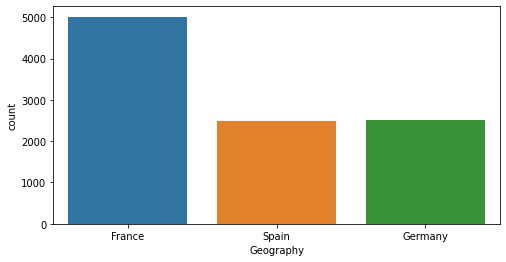

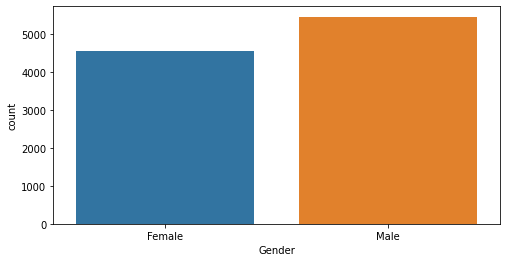

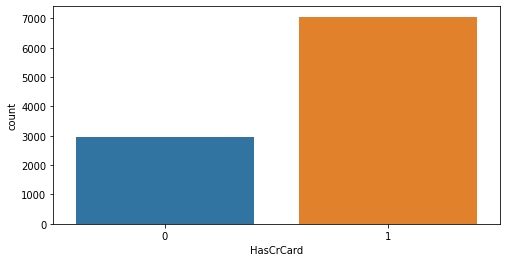

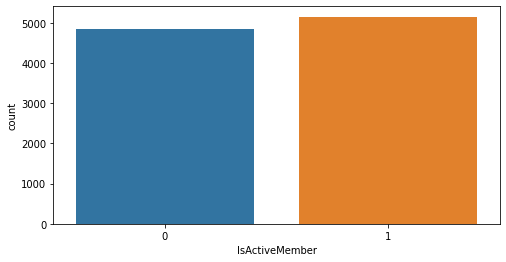

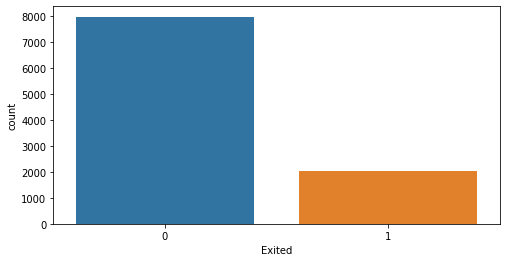

In [5]:
cats = ['Geography', 'Gender',  'HasCrCard', 'IsActiveMember', 'Exited']
for column in cats:
    plt.figure(figsize=(8,4))
    sns.color_palette('flare')
    sns.countplot(df[column])
    plt.show()

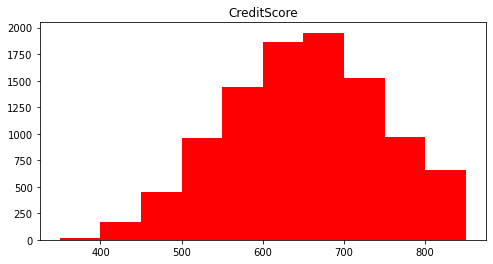

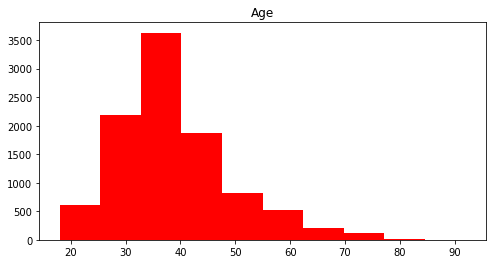

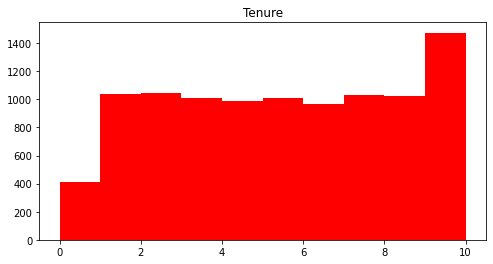

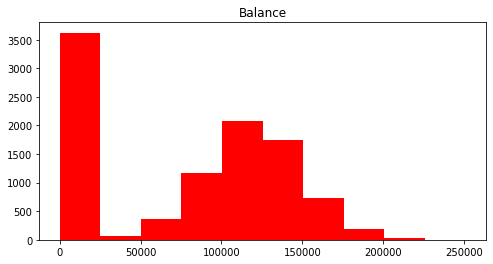

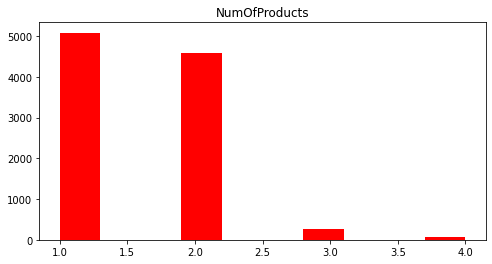

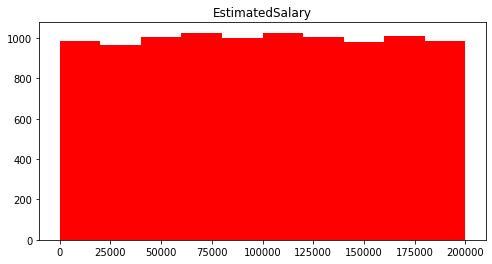

In [6]:
# Numeric data
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for column in nums:
    plt.figure(figsize=(8,4))
    plt.hist(df[column],color='red')
    plt.title(column)
    plt.show()

### B.Bivariate Analysis

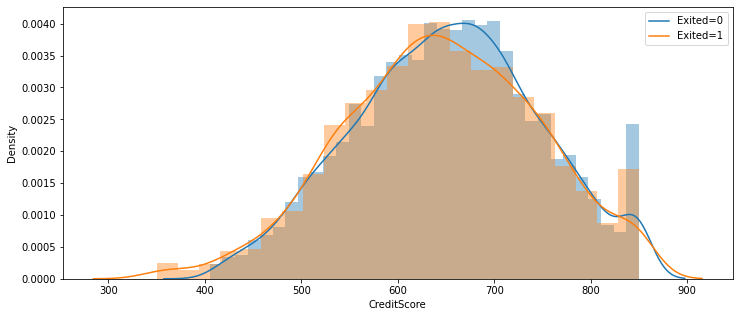

In [7]:
# numeric v/s categorical - probability density distribution -- distplot
# creditscore v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['CreditScore'][df.Exited==0])
sns.distplot(df['CreditScore'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

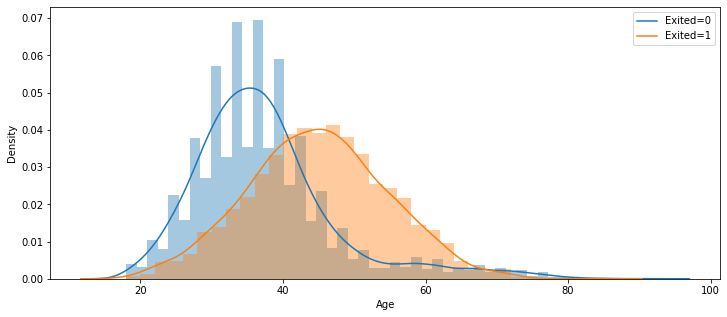

In [8]:
# Age v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['Age'][df.Exited==0])
sns.distplot(df['Age'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

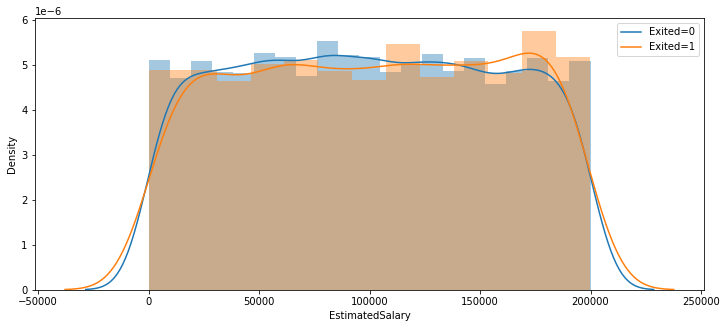

In [9]:
# EstimatedSalary v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['EstimatedSalary'][df.Exited==0])
sns.distplot(df['EstimatedSalary'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

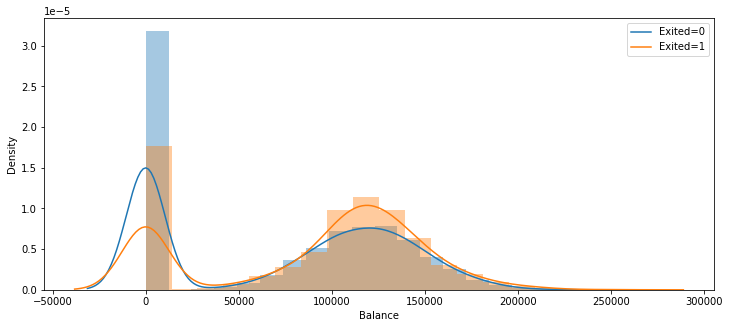

In [10]:
# Balance v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['Balance'][df.Exited==0])
sns.distplot(df['Balance'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

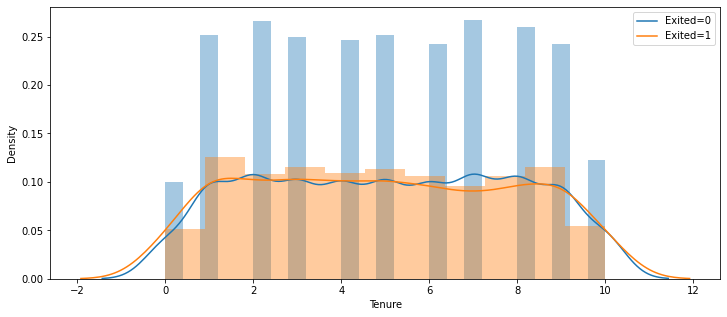

In [11]:
# Tenure v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['Tenure'][df.Exited==0])
sns.distplot(df['Tenure'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

In [12]:
# categorical v/s categorical 
# Geography v/s Exited
pivot = pd.crosstab(df.Geography,df.Exited,margins=True)
pivot

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [13]:
ratio = pivot[1]/pivot['All']
ratio

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

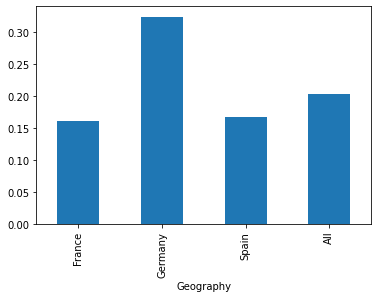

In [14]:
ratio.plot(kind='bar')

In [15]:
# Gender v/s Exited
pivot = pd.crosstab(df.Gender,df.Exited,margins=True)
ratio = pivot[1]/pivot['All']
ratio

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

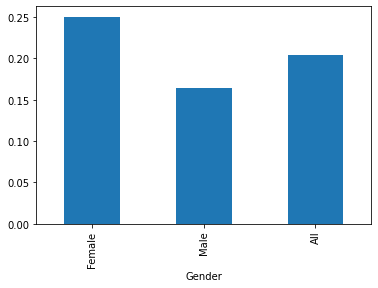

In [16]:
ratio.plot(kind='bar')

In [17]:
# HasCrCard v/s Exited
pivot = pd.crosstab(df.HasCrCard,df.Exited,margins=True)
ratio = pivot[1]/pivot['All']
ratio

HasCrCard
0      0.208149
1      0.201843
All    0.203700
dtype: float64

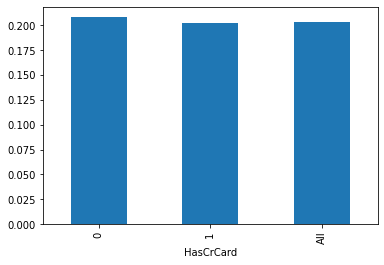

In [18]:
ratio.plot(kind='bar')

In [19]:
# IsActivemember v/s Exited
pivot = pd.crosstab(df.IsActiveMember,df.Exited,margins=True)
ratio = pivot[1]/pivot['All']
ratio

IsActiveMember
0      0.268509
1      0.142691
All    0.203700
dtype: float64

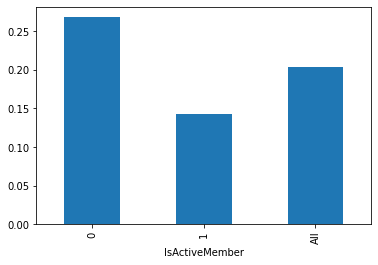

In [20]:
ratio.plot(kind='bar')

### C.Multivariate Analysis

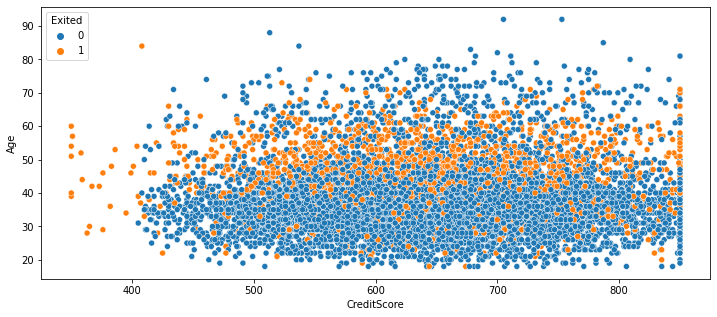

In [21]:
# numeric v/s numeric v/s categorical - scatterplot
# Age v/s Creditscore v/s Exited
plt.figure(figsize=(12,5))
sns.scatterplot(x='CreditScore',y='Age',hue="Exited",data=df)
plt.show()

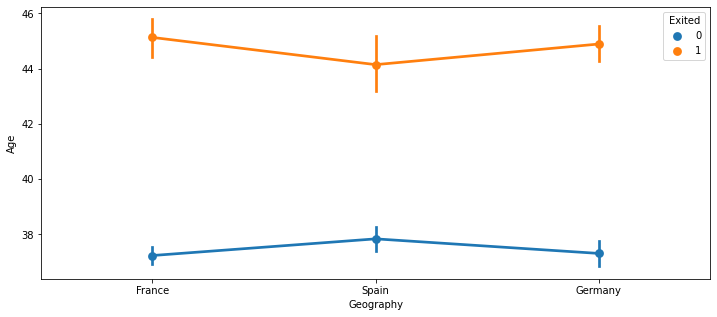

In [22]:
# Categorical v/s categorical v/s numeric = boxplot/pointplot/swarmplot
# Geography v/s Exited v/s Age
plt.figure(figsize=(12,5))
sns.pointplot(x='Geography',y='Age',hue='Exited',data=df)
plt.show()

## 4. Perform descriptive statistics on the dataset.

In [23]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handle the Missing values.

In [24]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 6. Find the outliers and replace the outliers

In [25]:
# check for outliers
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## 7. Check for Categorical columns and perform encoding.

In [26]:
cats = ['Geography', 'Gender',  'HasCrCard', 'IsActiveMember']
xd = df[cats]
yd = df['Exited']

xd.head()

,Geography,Gender,HasCrCard,IsActiveMember
0,France,Female,1,1
1,Spain,Female,0,1
2,France,Female,1,0
3,France,Female,0,0
4,Spain,Female,1,1


In [27]:
from sklearn.preprocessing import LabelEncoder
df['Geography'] = LabelEncoder().fit_transform(xd['Geography'])
df['Gender'] = LabelEncoder().fit_transform(xd['Gender'])


## 8. Split the data into dependent and independent variables.

In [28]:
#x-independent variable 
#y-dependent variable
x=df[['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y=df[['Exited']]

## 9. Scale the independent variables

In [29]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit_transform(x)

array([[-0.78321342, -0.32622142, -0.90188624, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.60653412, -0.44003595,  1.51506738, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-0.99588476, -1.53679418, -0.90188624, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-1.47928179,  0.60498839, -0.90188624, ..., -1.54776799,
         0.97024255, -1.00864308],
       [-0.11935577,  1.25683526,  0.30659057, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-0.87055909,  1.46377078, -0.90188624, ...,  0.64609167,
        -1.03067011, -1.07636976]])

## 10. Split the data into training and testing

In [30]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
x_train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7389,15676909,667,2,0,34,5,0.00,2,1,0,163830.64
9275,15749265,427,1,1,42,1,75681.52,1,1,1,57098.00
2995,15582492,535,0,0,29,2,112367.34,1,1,0,185630.76
5316,15780386,654,2,1,40,5,105683.63,1,1,0,173617.09
356,15611759,850,2,0,57,8,126776.30,2,1,1,132298.49


In [33]:
x_test.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9394,15615753,597,1,0,35,8,131101.04,1,1,1,192852.67
898,15654700,523,0,0,40,2,102967.41,1,1,0,128702.10
2398,15633877,706,2,0,42,8,95386.82,1,1,1,75732.25
5906,15745623,788,0,1,32,4,112079.58,1,0,0,89368.59
2343,15765902,706,1,1,38,5,163034.82,2,1,1,135662.17
